In [40]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split

#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import f_oneway

# Import for Hypothesis Testing
import scipy.stats as stats

# Import for acquisition
import os

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import wrangle as w
# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

In [42]:
#Getting the data from kaggle https://www.kaggle.com/datasets/bobbyscience/league-of-legends-soloq-ranked-games
df = pd.read_csv('lol_ranked_games.csv')

In [3]:
#check for nulls
#Since the data is clean and created columns we needed so there wont be a prep functions
#But still has to split data for explore
#Our target is haswon because we are which feautres contribute to win a match
df.isna().sum()

gameId                     0
gameDuration               0
hasWon                     0
frame                      0
goldDiff                   0
expDiff                    0
champLevelDiff             0
isFirstTower               0
isFirstBlood               0
killedFireDrake            0
killedWaterDrake           0
killedAirDrake             0
killedEarthDrake           0
killedElderDrake           0
lostFireDrake              0
lostWaterDrake             0
lostAirDrake               0
lostEarthDrake             0
lostElderDrake             0
killedBaronNashor          0
lostBaronNashor            0
killedRiftHerald           0
lostRiftHerald             0
destroyedTopInhibitor      0
destroyedMidInhibitor      0
destroyedBotInhibitor      0
lostTopInhibitor           0
lostMidInhibitor           0
lostBotInhibitor           0
destroyedTopNexusTurret    0
destroyedMidNexusTurret    0
destroyedBotNexusTurret    0
lostTopNexusTurret         0
lostMidNexusTurret         0
lostBotNexusTu

In [4]:
df.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,13,13,16,49,7,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242572 entries, 0 to 242571
Data columns (total 59 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   242572 non-null  int64  
 1   gameDuration             242572 non-null  int64  
 2   hasWon                   242572 non-null  int64  
 3   frame                    242572 non-null  int64  
 4   goldDiff                 242572 non-null  int64  
 5   expDiff                  242572 non-null  int64  
 6   champLevelDiff           242572 non-null  float64
 7   isFirstTower             242572 non-null  int64  
 8   isFirstBlood             242572 non-null  int64  
 9   killedFireDrake          242572 non-null  int64  
 10  killedWaterDrake         242572 non-null  int64  
 11  killedAirDrake           242572 non-null  int64  
 12  killedEarthDrake         242572 non-null  int64  
 13  killedElderDrake         242572 non-null  int64  
 14  lost

In [6]:
def split_data(df,target):
    '''
    This function takes in a dataframe and a target variable and split the data into 3: train, validate and test
    Establish train+validate set 80% of original data and then repeat the process 
    Split train+validate  into train, validate separately 
    '''
    train_validate, test = train_test_split(df, 
                                            test_size=.2, 
                                            random_state=123, 
                                            stratify=df[target])

    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    return train, validate, test

In [7]:
def split_X_y(train, validate, test, target):
    '''
    Splits train, validate, and test into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [8]:
train, validate, test = split_data(df, 'hasWon')

In [9]:
X_train, y_train, X_validate, y_validate, X_test, y_test = split_X_y(train, validate, test, 'hasWon')

In [10]:
train.shape[0], validate.shape[0], test.shape[0]

(135839, 58218, 48515)

Text(0.5, 1.0, 'Feautures Correlating with Value')

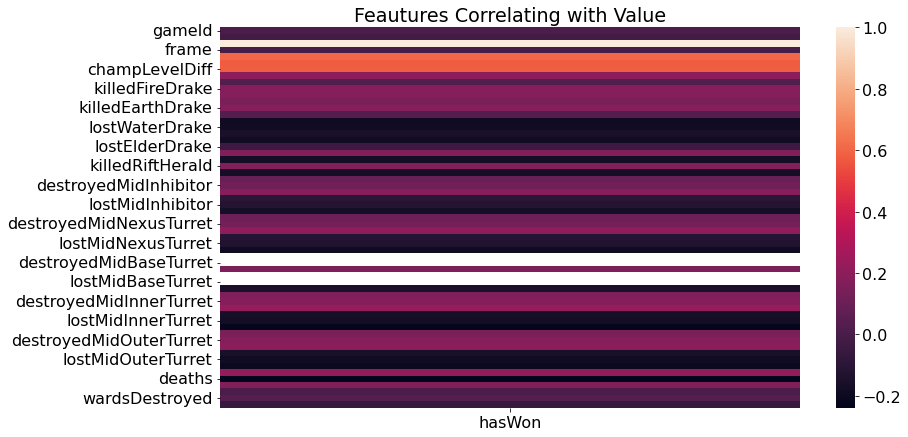

In [11]:
winning_correlation = train.corr()['hasWon'].to_frame()
heatmap = sns.heatmap(winning_correlation)
heatmap.set_title('Feautures Correlating with Value')

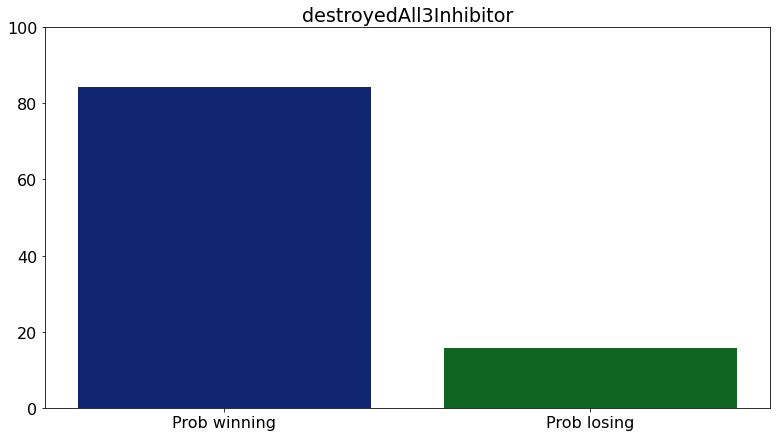

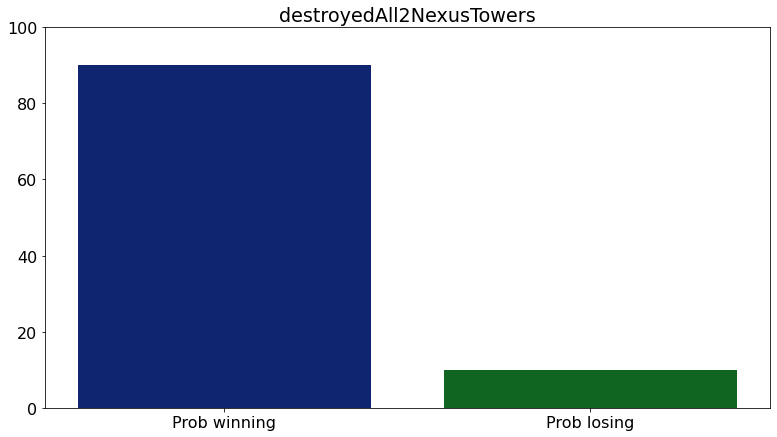

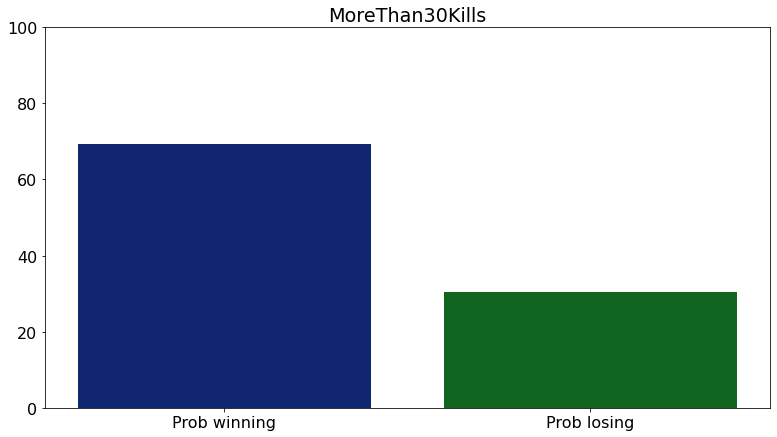

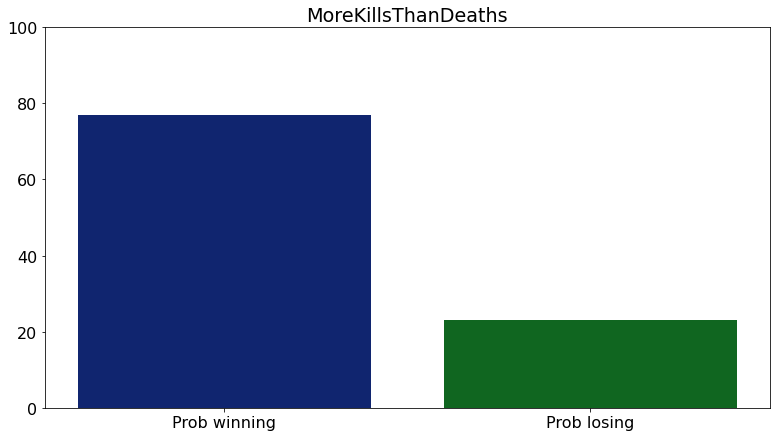

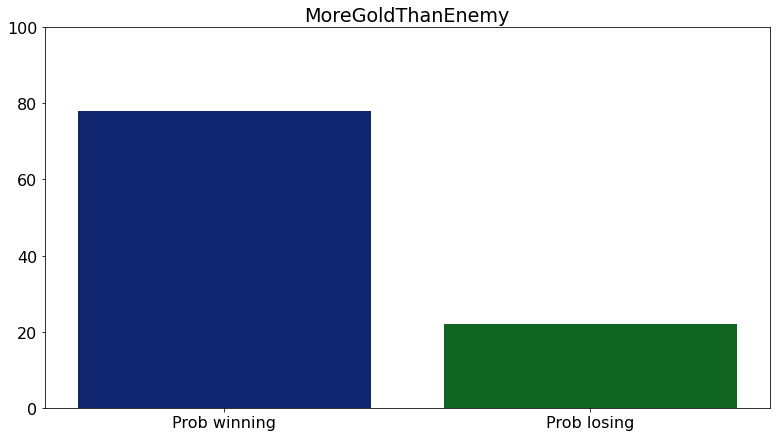

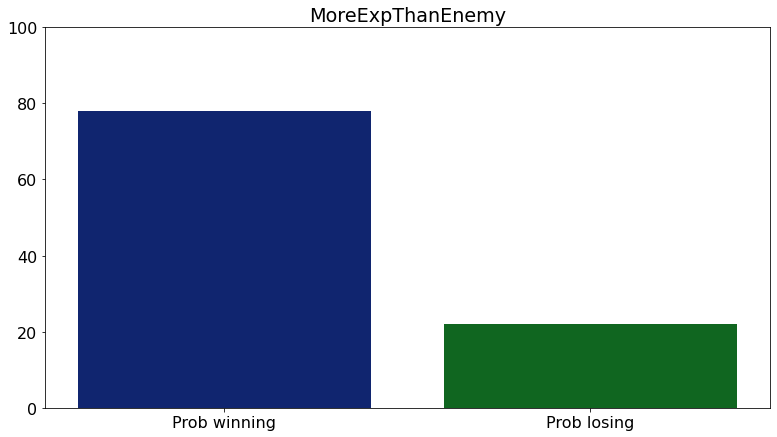

In [12]:


#Calculate probability of winning if you have destroyed all the enemy inhibitors
df_aux = pd.DataFrame(train, columns = ['destroyedTopInhibitor', 'destroyedMidInhibitor','destroyedBotInhibitor'])
df_aux = df_aux.sum(axis=1)
wins_with_all_inhibitors = sum(np.logical_and(df_aux == 3, train['hasWon'] == 1))
all_games_3_inhibis = sum(df_aux == 3)
Prob_winning = wins_with_all_inhibitors / all_games_3_inhibis * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('destroyedAll3Inhibitor')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have destroyed all the enemy nexus towers
df_aux = pd.DataFrame(train, columns = ['destroyedTopNexusTurret', 'destroyedMidNexusTurret','destroyedBotNexusTurret'])
df_aux = df_aux.sum(axis=1)
wins_with_all_nexus_towers = sum(np.logical_and(df_aux == 3, train['hasWon'] == 1))
all_games_2_nexus_towers = sum(df_aux == 3)
Prob_winning = wins_with_all_nexus_towers / all_games_2_nexus_towers * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('destroyedAll2NexusTowers')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more than 30 kills
Prob_winning = sum(np.logical_and(train['kills'] > 30, train['hasWon'] == 1)) / sum(train['kills'] > 30) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreThan30Kills')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more kills than deaths
Prob_winning = sum(np.logical_and(train['kills'] > train['deaths'], train['hasWon'] == 1)) / sum(train['kills'] > train['deaths']) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreKillsThanDeaths')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more gold than the enemy
Prob_winning = sum(np.logical_and(train['goldDiff'] > 0, train['hasWon'] == 1)) / sum(train['goldDiff'] > 0) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreGoldThanEnemy')
ax.set_ylim([0,100])
plt.plot()
plt.show()

#Calculate probability of winning if you have more exp than the enemy
Prob_winning = sum(np.logical_and(train['expDiff'] > 0, train['hasWon'] == 1)) / sum(train['expDiff'] > 0) * 100
ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
ax.set_title('MoreExpThanEnemy')
ax.set_ylim([0,100])
plt.plot()
plt.show()

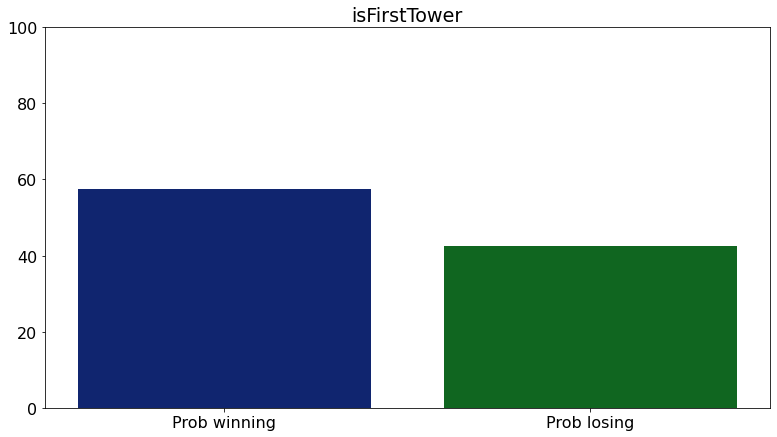

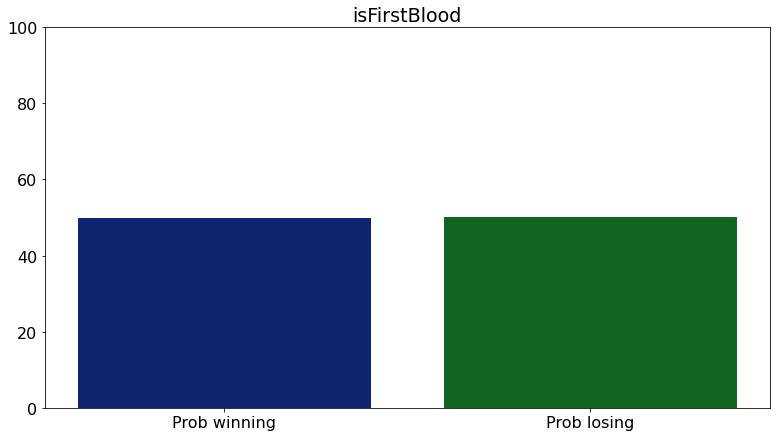

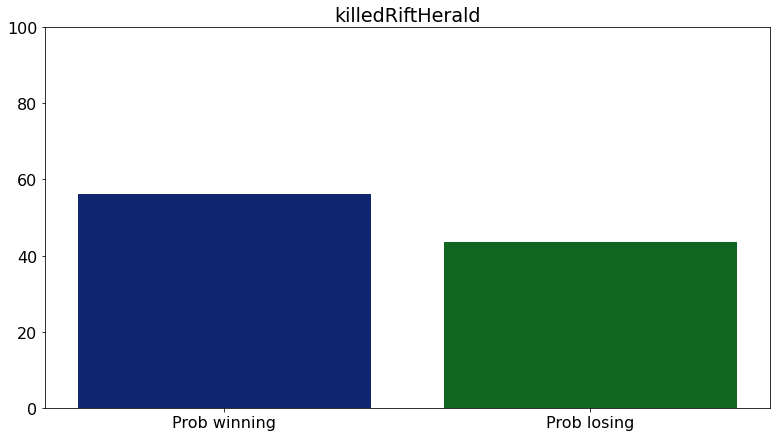

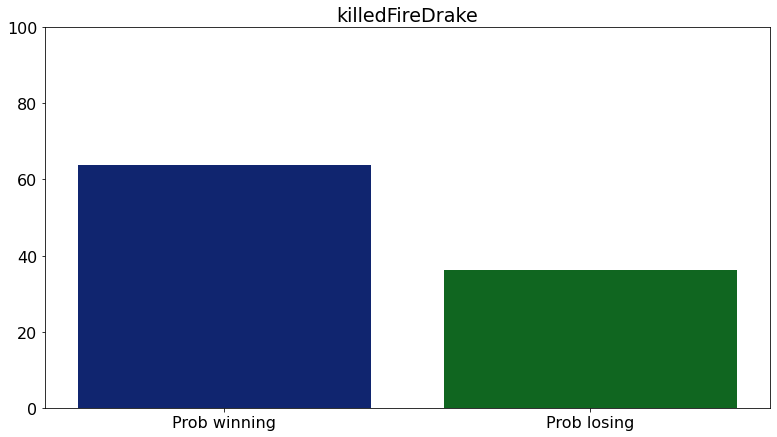

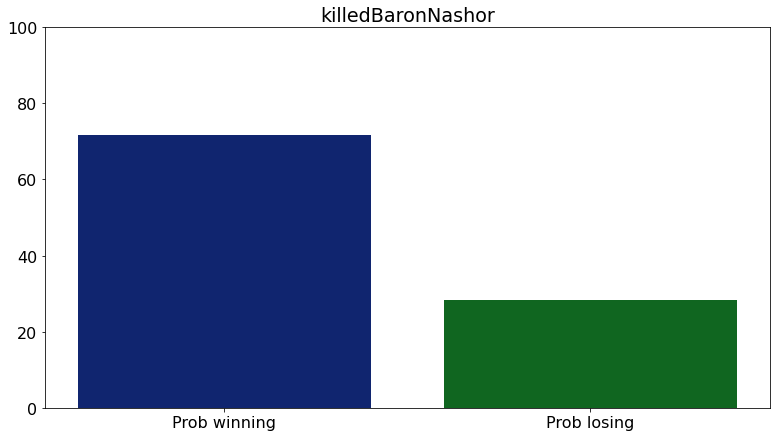

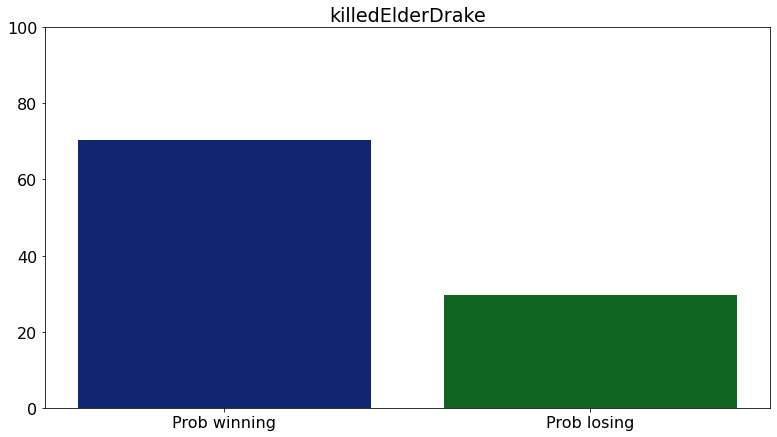

In [13]:
#We obtain the number of rows that win and get the first towers  and we divide it by the total of rows to get the probability
attributes = ['isFirstTower', 'isFirstBlood','killedRiftHerald', 'killedFireDrake', 'killedBaronNashor', 'killedElderDrake']
for atribute in attributes:
    Prob_winning = sum(np.logical_and(train[atribute] == 1, train['hasWon'] == 1)) / sum(train[atribute] == 1) * 100
    ax = sns.barplot(['Prob winning', 'Prob losing'], [Prob_winning, 100- Prob_winning])
    ax.set_title(atribute)
    ax.set_ylim([0,100])
    plt.plot()
    plt.show()

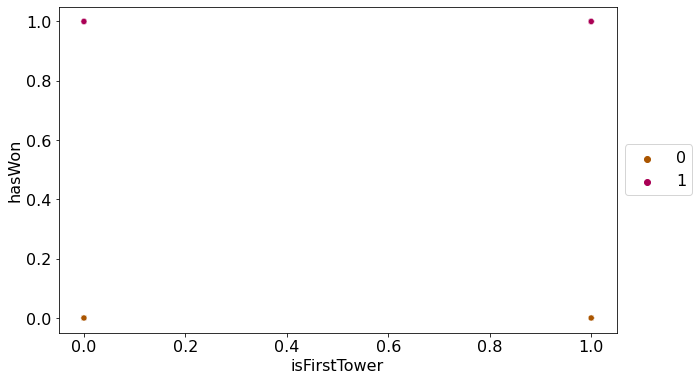

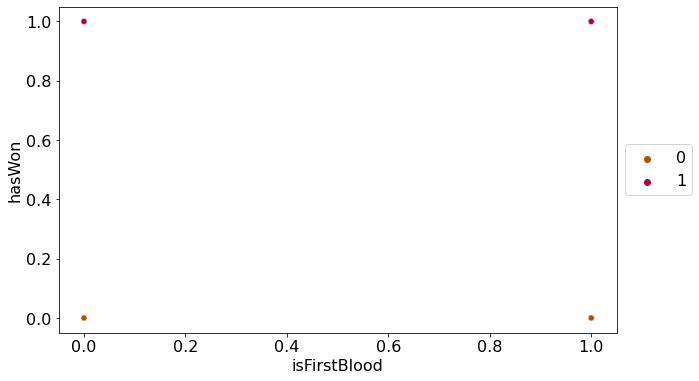

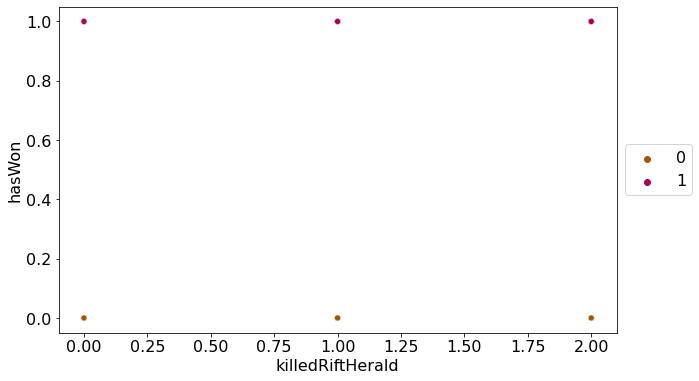

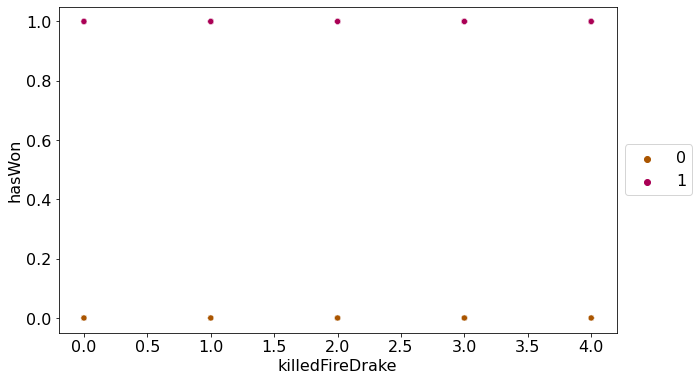

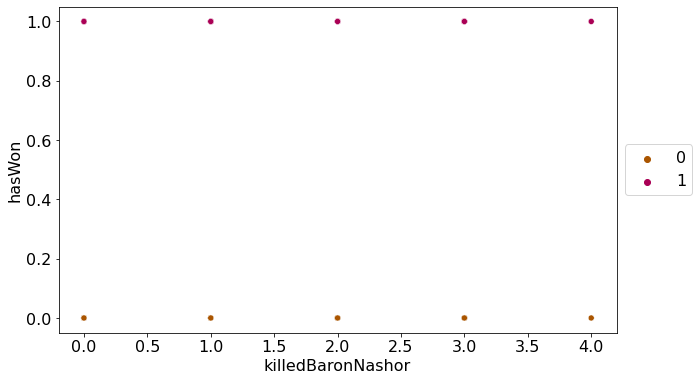

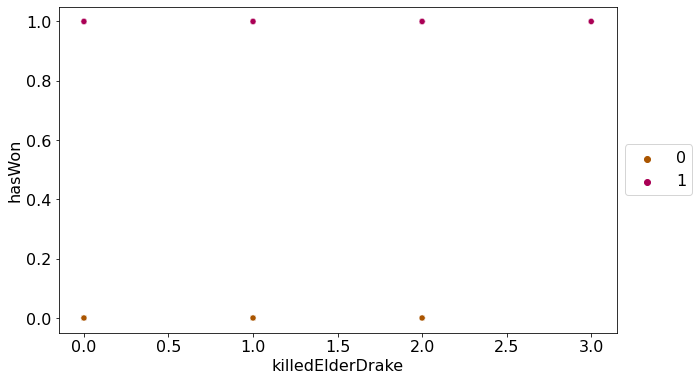

In [35]:
for i in attributes:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x= i, y='hasWon',data=train,hue='hasWon', palette='brg_r')
    #plt.title(f'{i} and {'hasWon'}', fontsize = 20)
    #plt.legend(loc="upper center", bbox_to_anchor=(1, 1), ncol=1) #hm
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.show() 

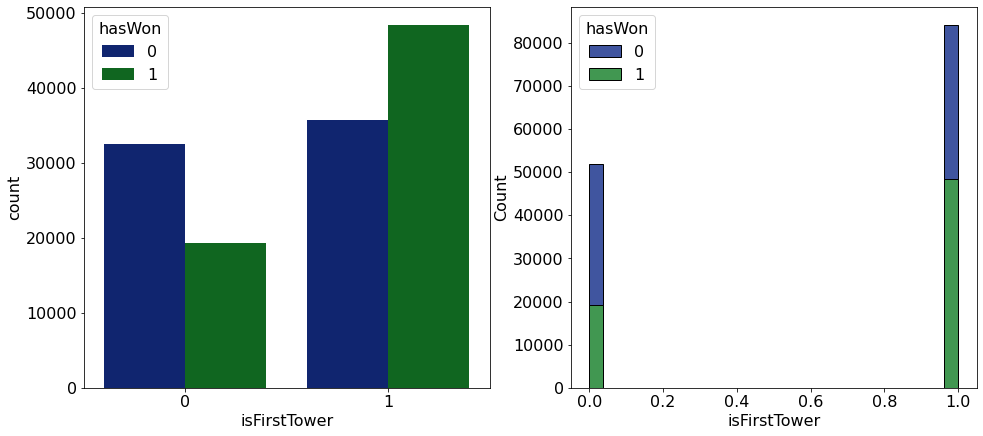

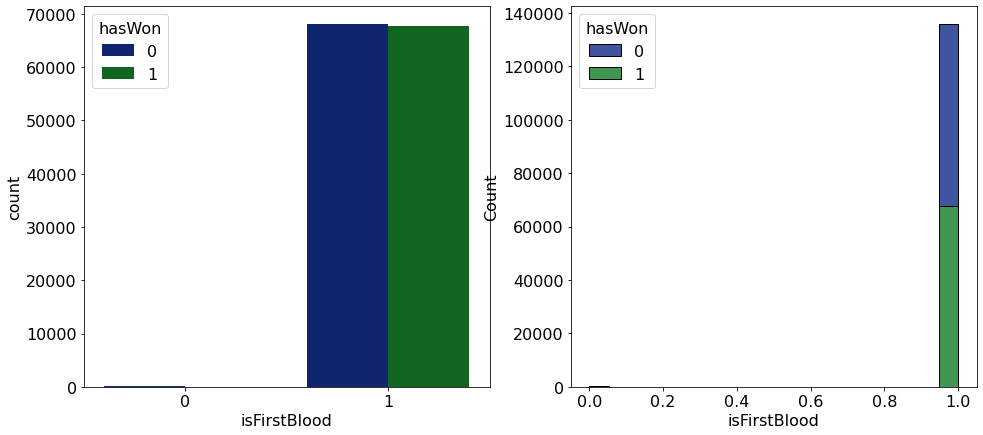

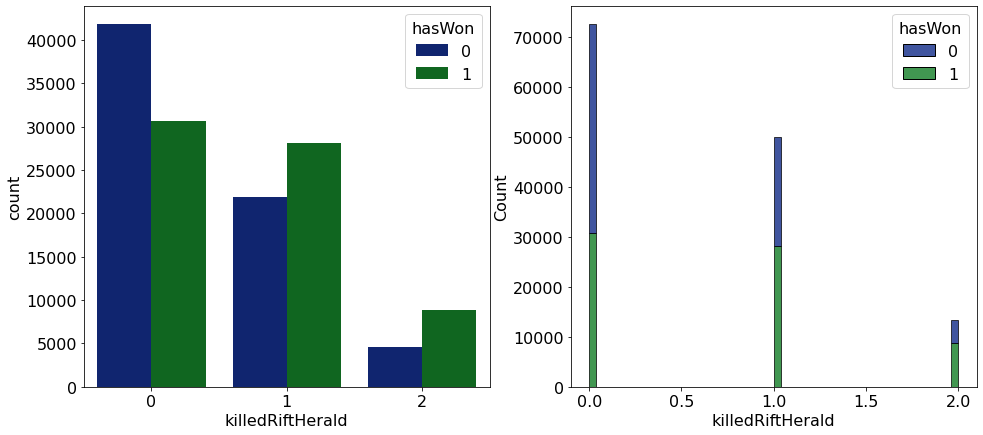

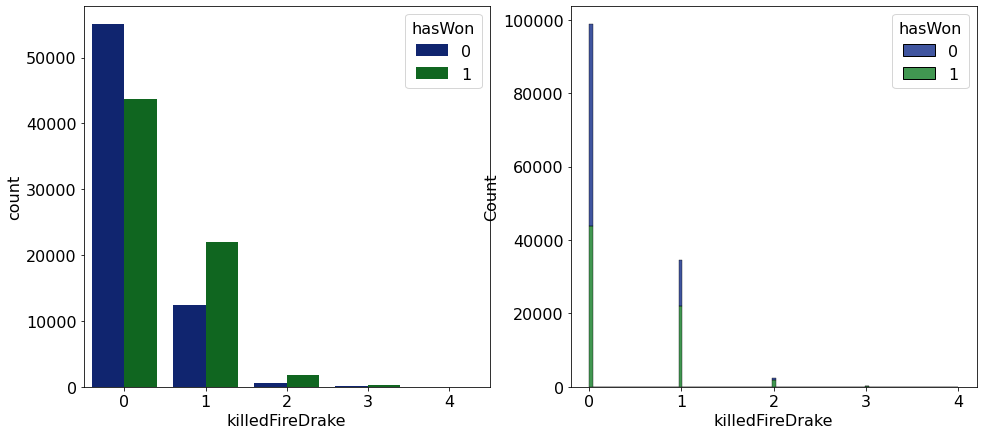

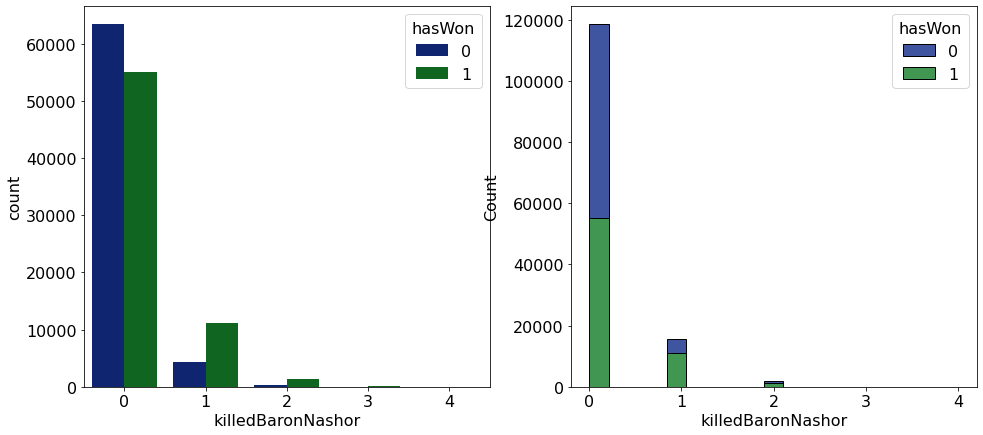

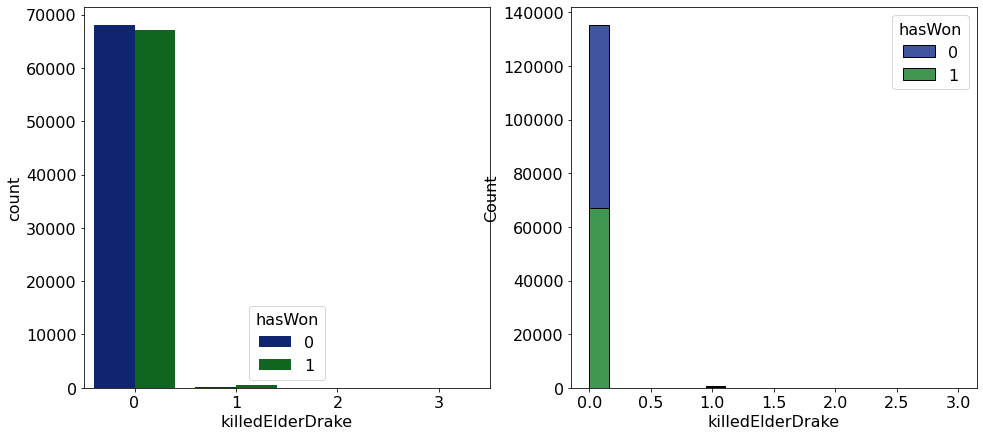

In [38]:
for i in attributes:
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(16,7))
    sns.countplot(data=train, hue='hasWon', x=i, ax=ax1)
    sns.histplot(data=train, x=i, hue='hasWon', multiple='stack', ax=ax2)
    plt.show()

In [14]:
def selectkbest(X_train_scaled, y_train, n):
    '''
    selectkbest takes in X_train scaled, y_train, and a desired number of features and returns 
    the selected features to be used in modeling
    '''
    f_selector = SelectKBest(k=n)
    f_selector.fit(X_train_scaled, y_train)
    f_support = f_selector.get_support()
    f_feature = X_train_scaled.loc[:,f_support].columns.tolist()
    print(str(len(f_feature)), 'selected features')
    print(f_feature)
    return f_feature

In [15]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [16]:
X_train_scaled, X_validate_scaled, X_test_scaled = w.standard_scale_data(X_train, X_validate, X_test)

In [17]:
#using Select K Best for 10 features to use
new_kbest = selectkbest(X_train_scaled, y_train, 10)

10 selected features
['goldDiff', 'expDiff', 'champLevelDiff', 'destroyedBotNexusTurret', 'destroyedBotInnerTurret', 'lostBotInnerTurret', 'destroyedBotOuterTurret', 'lostBotOuterTurret', 'kills', 'deaths']


In [23]:
def get_metrics(train, validate, test, x_col, y_col, y_pred, clf):
    '''
    get_metrics takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    X_train, y_train = train[x_col], train[y_col]

    X_validate, y_validate = validate[x_col], validate[y_col]

    X_test, y_test = test[x_col], validate[y_col]
    
    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [19]:
#our selected features
x_col = new_kbest
y_col= 'hasWon'

In [20]:
#using only our features
X_train, y_train = train[new_kbest], train[y_col]

X_validate, y_validate = validate[new_kbest], validate[y_col]

X_test, y_test = test[new_kbest], test[y_col]

In [21]:
from sklearn.dummy import DummyClassifier
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
print(f'The baseline accuracy for hasWon in all cases on the League of Legends matches Dataset is {baseline.score(X_train, y_train):.4%}')

The baseline accuracy for hasWon in all cases on the League of Legends matches Dataset is 50.1874%


In [24]:
#set parameters, fit to our X and y train, get a score for train and validate sets.
tree = DecisionTreeClassifier(max_leaf_nodes=12, max_depth=5)
tree.fit(X_train,y_train)
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')
y_pred = tree.predict(X_train)
get_metrics(train, validate, test, x_col, y_col, y_pred, tree)

training score: 78.41%
validate score: 78.09%

    The accuracy for our model is 0.7841
    The True Positive Rate is 0.752, The False Positive Rate is 0.184,
    The True Negative Rate is 0.816, and the False Negative Rate is 0.248
    


,precision,recall,f1-score,support
0,0.768432,0.815604,0.791316,68174.000000
1,0.801969,0.752368,0.776377,67665.000000
accuracy,0.784105,0.784105,0.784105,0.784105
macro avg,0.785201,0.783986,0.783847,135839.000000
weighted avg,0.785138,0.784105,0.783875,135839.000000


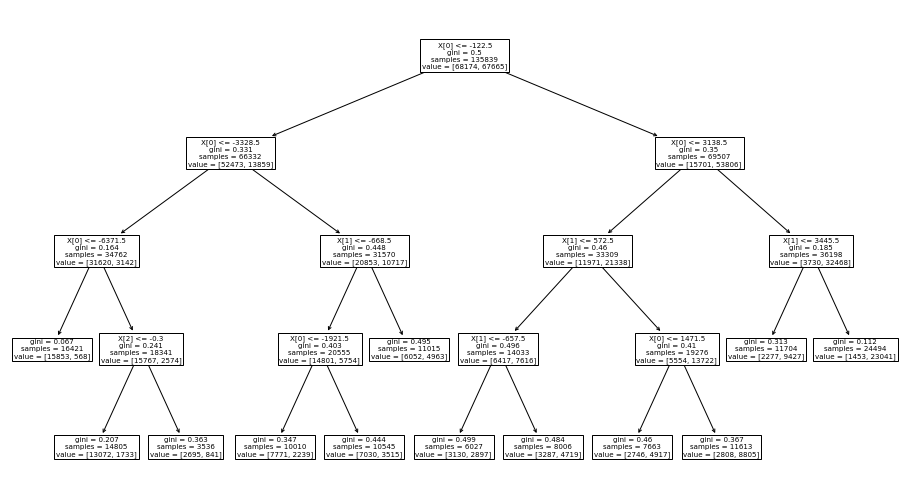

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     68174
           1       0.80      0.80      0.80     67665

    accuracy                           0.80    135839
   macro avg       0.80      0.80      0.80    135839
weighted avg       0.80      0.80      0.80    135839



In [41]:
#visualize our decision tree
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

print(classification_report(y_train, y_pred))

In [26]:
#set parameters, fit to our X and y train, get a score for train and validate sets.
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print(f'training score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')
get_metrics(train, validate, test, x_col, y_col, y_pred, rf)

training score: 78.81%
validate score: 78.49%

    The accuracy for our model is 0.7881
    The True Positive Rate is 0.785, The False Positive Rate is 0.209,
    The True Negative Rate is 0.791, and the False Negative Rate is 0.215
    


,precision,recall,f1-score,support
0,0.787486,0.791240,0.789359,68174.000000
1,0.788655,0.784867,0.786756,67665.000000
accuracy,0.788065,0.788065,0.788065,0.788065
macro avg,0.788070,0.788053,0.788057,135839.000000
weighted avg,0.788068,0.788065,0.788062,135839.000000


In [27]:
#set parameters, fit to our X and y train, get a score for train and validate sets.
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(f'training score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
get_metrics(train, validate, test, x_col, y_col, y_pred, knn)

training score: 80.04%
validate score: 77.29%

    The accuracy for our model is 0.8004
    The True Positive Rate is 0.8, The False Positive Rate is 0.199,
    The True Negative Rate is 0.801, and the False Negative Rate is 0.2
    


,precision,recall,f1-score,support
0,0.801457,0.800540,0.800998,68174.000000
1,0.799271,0.800192,0.799731,67665.000000
accuracy,0.800367,0.800367,0.800367,0.800367
macro avg,0.800364,0.800366,0.800365,135839.000000
weighted avg,0.800368,0.800367,0.800367,135839.000000
